In [1]:
# -*- coding: utf-8 -*-
files = [
    "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/1b_steps/unconditional/reasonable_structures_with_ehull.csv",
    "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/1b_steps/test.comp_to_material.response.valid.structures/reasonable_structures_with_ehull.csv",
    "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/1b_steps/test.bandgap_to_mat.response.valid.structures/reasonable_structures_with_ehull.csv",
    "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/1b_steps/test.comp_bgap_to_material.response.valid.structures/reasonable_structures_with_ehull.csv",
    "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/1b_steps/test.bulk.tsv.response.valid.structures/reasonable_structures_with_ehull.csv",
    
    "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/8b_steps/unconditional/reasonable_structures_with_ehull.csv",
    "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/8b_steps/test.comp_to_material.response.valid.structures/reasonable_structures_with_ehull.csv",
    "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/8b_steps/test.bandgap_to_mat.response.valid.structures/reasonable_structures_with_ehull.csv",
    "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/8b_steps/test.comp_bgap_to_material.response.valid.structures/reasonable_structures_with_ehull.csv",
    "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/8b_steps/test.bulk.tsv.response.valid.structures/reasonable_structures_with_ehull.csv",

    "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/8x7b/unconditional/reasonable_structures_with_ehull.csv",
]


In [1]:
# files = [
#     "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/1b_steps/unconditional/reasonable_structures_with_ehull.csv",
#     "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/8b_steps/unconditional/reasonable_structures_with_ehull.csv",
#     "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/8x7b/vllm/uncondition/1_material_new/relaxed_atoms_with_ehull.csv",
# ]

# files = [
#     "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/1b_steps/test.comp_bgap_to_material.response.valid.structures/reasonable_structures_with_ehull.csv",
#     "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/8b_steps/test.comp_bgap_to_material.response.valid.structures/reasonable_structures_with_ehull.csv",
#     "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/8x7b/global_step7755_restore_new/test.bandgap_to_mat.response.valid.structures/relaxed_atoms_with_ehull.csv",
# ]

# files = [
#     "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/1b_steps/test.bandgap_to_mat.response.valid.structures/reasonable_structures_with_ehull.csv",
#     "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/8b_steps/test.bandgap_to_mat.response.valid.structures/reasonable_structures_with_ehull.csv",
#     "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/8x7b/global_step7755_restore_new/test.bandgap_to_mat.response.valid.structures/relaxed_atoms_with_ehull.csv",
# ]

# files = [
#     "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/1b_steps/test.bulk.tsv.response.valid.structures/reasonable_structures_with_ehull.csv",
#     "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/8b_steps/test.bulk.tsv.response.valid.structures/reasonable_structures_with_ehull.csv",
#     "/msralaphilly2/ml-la/renqian/SFM/threedimargen/data/materials_data/instruct/result_collection/8x7b/global_step7755_restore_new/test.bulk.response.valid.structures/relaxed_atoms_with_ehull.csv"
# ]

In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

file_indices = {
    0: "SFM-Seq 1B",
    1: "SFM-Seq 8B",
    2: "SFM-Seq 8x7B"
}


def plot_all():
    data = []
    for i, model in file_indices.items():
        with open(files[i], "r") as f:
            csv_data = pd.read_csv(f)
        ehulls = csv_data["e_hull"]
        for ehull in ehulls:
            if ehull < 1:
                data.append({"model": model, "e_hull": ehull})
    df = pd.DataFrame(data) 
    #sns.violinplot(x="model", y="e_hull", data=df, palette="Set2", legend=False)
    #sns.histplot(x="model", y="e_hull", data=df, palette="Set2", legend=False)
    fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
    dist1 = df[df["model"] == file_indices[0]]["e_hull"]
    dist2 = df[df["model"] == file_indices[1]]["e_hull"]
    dist3 = df[df["model"] == file_indices[2]]["e_hull"]
    if len(dist1) > 500:
        dist1 = dist1.sample(500)
    if len(dist2) > 500:
        dist2 = dist2.sample(500)
    if len(dist3) > 500:
        dist3 = dist3.sample(500)


    axs[0].hist(dist1, bins=10)
    axs[1].hist(dist2, bins=10)
    axs[2].hist(dist3, bins=10)
    axs[0].set_title("1B")
    axs[1].set_title("8B")
    axs[2].set_title("8x7B")
    axs[0].set_xlabel("e_hull")
    axs[1].set_xlabel("e_hull")
    axs[2].set_xlabel("e_hull")
    axs[0].set_ylabel("count")
    axs[1].set_ylabel("count")
    axs[2].set_ylabel("count")
    
 
    plt.show()


def plot(index, model=""):
    data = []
    
    with open(files[index], "r") as f:
        csv_data = pd.read_csv(f)
    ehulls = csv_data["e_hull"]
    for ehull in ehulls:
        if ehull < 1:
            data.append({"model": model, "e_hull": ehull})
    df = pd.DataFrame(data) 
    dist = df[df["model"] == model]["e_hull"]

    plt.figure(figsize=(6, 5))
    sns.histplot(dist, bins=50, kde=True, stat="probability", alpha=0.4, label=model, edgecolor=None)
    #plt.title(model)
    plt.ylim(0, 0.06)
    plt.legend()
 
    #plt.tight_layout()
    plt.savefig(f"{model}_ehull.pdf", bbox_inches="tight", pad_inches=0)
    plt.show()
    print("mean:", np.mean(dist))
    print("std:", np.std(dist))
    print("max:", np.max(dist))
    print("min:", np.min(dist))
    print("median:", np.median(dist))
    print("count:", len(dist))
    stability_ratio = len(dist[dist < 0.1]) / len(dist)
    print(f"stability ratio: {stability_ratio:.4f}")
                

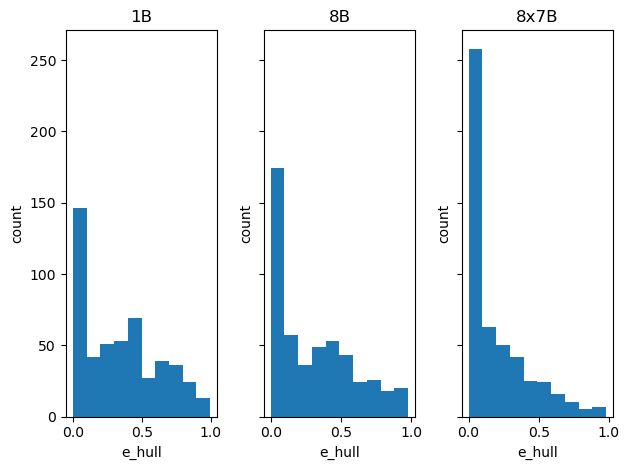

In [17]:
plot_all()

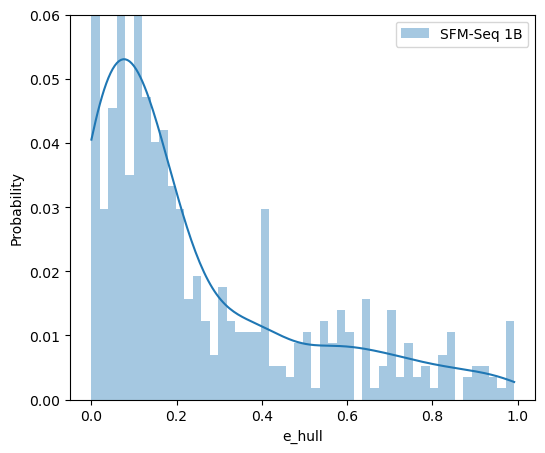

mean: 0.2303556887548331
std: 0.2508454298437458
max: 0.99169096538086
min: 0.0
median: 0.1273173498990871
count: 572
stability ratio: 0.3654


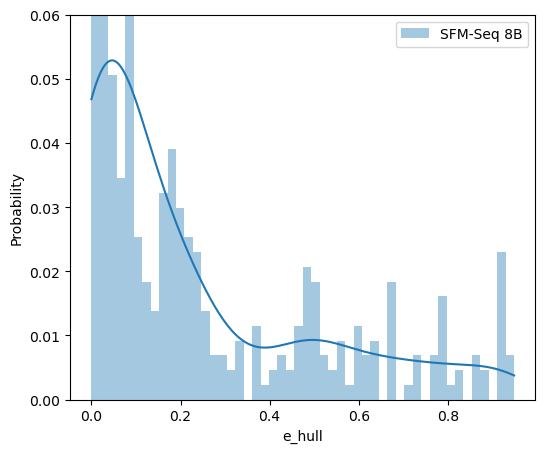

mean: 0.2111266654188636
std: 0.25742990887316286
max: 0.9485690977229826
min: 0.0
median: 0.0865885916751576
count: 435
stability ratio: 0.5333


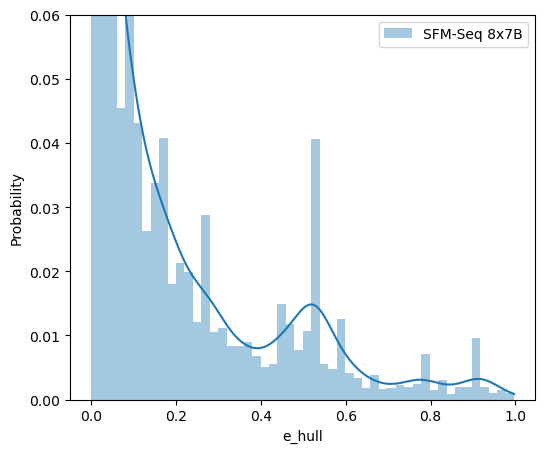

mean: 0.181584694938751
std: 0.21956873511686312
max: 0.9971914659330244
min: 0.0
median: 0.0882997687858075
count: 5639
stability ratio: 0.5286


In [3]:
for i, model in file_indices.items():
    plot(i, model)


In [16]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

file_indices = {
    0: "1B",
    1: "8B",
    2: "8x7B"
}


def plot_all():
    data = []
    for i, model in file_indices.items():
        with open(files[i], "r") as f:
            csv_data = pd.read_csv(f)
        ehulls = csv_data["e_hull"]
        for ehull in ehulls:
            if ehull < 1:
                data.append({"model": model, "e_hull": ehull})
    df = pd.DataFrame(data) 
    #sns.violinplot(x="model", y="e_hull", data=df, palette="Set2", legend=False)
    #sns.histplot(x="model", y="e_hull", data=df, palette="Set2", legend=False)
    fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
    dist1 = df[df["model"] == "1B"]["e_hull"]
    dist2 = df[df["model"] == "8B"]["e_hull"]
    dist3 = df[df["model"] == "8x7B"]["e_hull"]
    if len(dist1) > 500:
        dist1 = dist1.sample(500)
    if len(dist2) > 500:
        dist2 = dist2.sample(500)
    if len(dist3) > 500:
        dist3 = dist3.sample(500)

    axs[0].hist(dist1, bins=10)
    axs[1].hist(dist2, bins=10)
    axs[2].hist(dist3, bins=10)
    axs[0].set_title("1B")
    axs[1].set_title("8B")
    axs[2].set_title("8x7B")
    axs[0].set_xlabel("e_hull")
    axs[1].set_xlabel("e_hull")
    axs[2].set_xlabel("e_hull")
    axs[0].set_ylabel("count")
    axs[1].set_ylabel("count")
    axs[2].set_ylabel("count")
    
 
    plt.show()
    print("mean:", np.mean(dist1))
    print("std:", np.std(dist1))
    print("max:", np.max(dist1))
    print("min:", np.min(dist1))
    print("median:", np.median(dist1))
    print("count:", len(dist1))
    print(f"stability ratio: {len(dist1[dist1 < 0.1]) / len(dist1):.4f}")

    print("mean:", np.mean(dist2))
    print("std:", np.std(dist2))
    print("max:", np.max(dist2))
    print("min:", np.min(dist2))
    print("median:", np.median(dist2))
    print("count:", len(dist2))
    print(f"stability ratio: {len(dist2[dist2 < 0.1]) / len(dist2):.4f}")

    print("mean:", np.mean(dist3))
    print("std:", np.std(dist3))
    print("max:", np.max(dist3))
    print("min:", np.min(dist3))
    print("median:", np.median(dist3))
    print("count:", len(dist3))
    print(f"stability ratio: {len(dist3[dist3 < 0.1]) / len(dist3):.4f}")


def plot(index, model=""):
    data = []
    
    with open(files[index], "r") as f:
        csv_data = pd.read_csv(f)
    ehulls = csv_data["e_hull"]
    for ehull in ehulls:
        if ehull < 1:
            data.append({"model": model, "e_hull": ehull})
    df = pd.DataFrame(data) 
    #sns.violinplot(x="model", y="e_hull", data=df, palette="Set2", legend=False)
    #sns.histplot(x="model", y="e_hull", data=df, palette="Set2", legend=False)
    dist = df[df["model"] == model]["e_hull"]
    plt.hist(dist, bins=10)
    plt.title(model)
 
    plt.show()
    print("mean:", np.mean(dist))
    print("std:", np.std(dist))
    print("max:", np.max(dist))
    print("min:", np.min(dist))
    print("median:", np.median(dist))
    print("count:", len(dist))
                

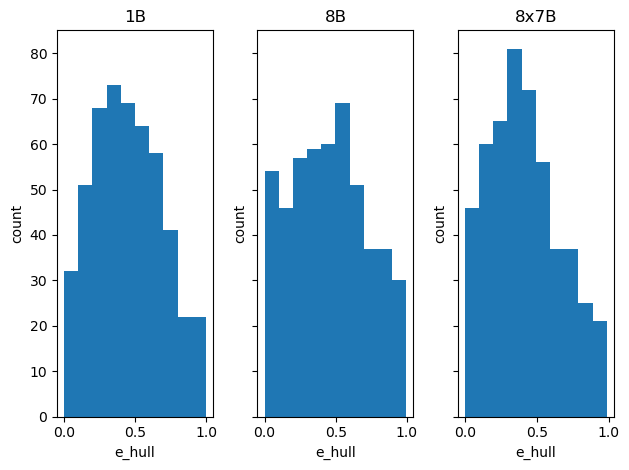

mean: 0.4488941596713199
std: 0.23824821211972227
max: 0.9994368520165092
min: 0.0
median: 0.4319790681523661
count: 500
stability ratio: 0.0640
mean: 0.459378374311176
std: 0.2651844055424112
max: 0.9959276844202448
min: 0.0
median: 0.452703977842865
count: 500
stability ratio: 0.1100
mean: 0.41651499167881034
std: 0.2459887141091452
max: 0.9871737571046006
min: 0.0
median: 0.3939209389409646
count: 500
stability ratio: 0.0920


In [17]:
plot_all()

In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

file_indices = {
    0: "1B",
    1: "8B",
    2: "8x7B"
}

# file_indices = {
#     0: "1B",
#     1: "8B",
#     2: "8x7B"
# }

def plot_all():
    data = []
    for i, model in file_indices.items():
        with open(files[i], "r") as f:
            csv_data = pd.read_csv(f)
        ehulls = csv_data["e_hull"]
        for ehull in ehulls:
            if ehull < 1:
                data.append({"model": model, "e_hull": ehull})
    df = pd.DataFrame(data) 
    #sns.violinplot(x="model", y="e_hull", data=df, palette="Set2", legend=False)
    #sns.histplot(x="model", y="e_hull", data=df, palette="Set2", legend=False)
    fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
    dist1 = df[df["model"] == "1B"]["e_hull"]
    dist2 = df[df["model"] == "8B"]["e_hull"]
    dist3 = df[df["model"] == "8x7B"]["e_hull"]
    if len(dist3) > 600:
        dist3 = dist3.sample(600)

    axs[0].hist(dist1, bins=10)
    axs[1].hist(dist2, bins=10)
    axs[2].hist(dist3, bins=10)
    axs[0].set_title("1B")
    axs[1].set_title("8B")
    axs[2].set_title("8x7B")
    axs[0].set_xlabel("e_hull")
    axs[1].set_xlabel("e_hull")
    axs[2].set_xlabel("e_hull")
    axs[0].set_ylabel("count")
    axs[1].set_ylabel("count")
    axs[2].set_ylabel("count")
    
 
    plt.show()
    print("mean:", np.mean(dist1))
    print("std:", np.std(dist1))
    print("max:", np.max(dist1))
    print("min:", np.min(dist1))
    print("median:", np.median(dist1))
    print("count:", len(dist1))
    print("stability ratio:", len(dist1[dist1 < 0.1]) / len(dist1))

    print("mean:", np.mean(dist2))
    print("std:", np.std(dist2))
    print("max:", np.max(dist2))
    print("min:", np.min(dist2))
    print("median:", np.median(dist2))
    print("count:", len(dist2))
    print("stability ratio:", len(dist2[dist2 < 0.1]) / len(dist2))

    print("mean:", np.mean(dist3))
    print("std:", np.std(dist3))
    print("max:", np.max(dist3))
    print("min:", np.min(dist3))
    print("median:", np.median(dist3))
    print("count:", len(dist3))
    print("stability ratio:", len(dist3[dist3 < 0.1]) / len(dist3))


def plot(index, model=""):
    data = []
    
    with open(files[index], "r") as f:
        csv_data = pd.read_csv(f)
    ehulls = csv_data["e_hull"]
    for ehull in ehulls:
        if ehull < 1:
            data.append({"model": model, "e_hull": ehull})
    df = pd.DataFrame(data) 
    #sns.violinplot(x="model", y="e_hull", data=df, palette="Set2", legend=False)
    #sns.histplot(x="model", y="e_hull", data=df, palette="Set2", legend=False)
    dist = df[df["model"] == model]["e_hull"]
    plt.hist(dist, bins=10)
    plt.title(model)
 
    plt.show()
    print("mean:", np.mean(dist))
    print("std:", np.std(dist))
    print("max:", np.max(dist))
    print("min:", np.min(dist))
    print("median:", np.median(dist))
    print("count:", len(dist))
                